# RSI algorithm test playground

The rsi algorithmn is tested with random generated data.



In [1]:
from typing import Tuple, Callable, List, Optional, TypeVar

import matplotlib.pyplot as plt
import talib
import pandas as pd

from bot.bot import TradingBot, Order, rsi_analyzer, moving_average

import bot.trend_simulator as ts
import logging

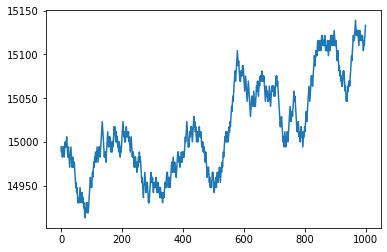

In [8]:
price_trend = ts.load_csv_data("random_trend_15000.csv", 15000, 5.8)
plt.plot(price_trend['Coin1'])
plt.show()


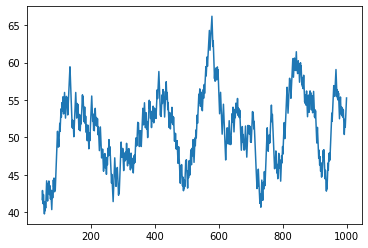

In [9]:
rsi = talib.RSI(price_trend["Coin1"].to_numpy(), timeperiod=48)
plt.plot(rsi)
plt.show()

In [26]:
price_trend["MA24"] = price_trend["Coin1"].rolling(24).mean()
rsi = talib.RSI(price_trend["Coin1"].to_numpy(), timeperiod=48)
price_trend["rsi"] = pd.Series(rsi)
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
price_trend[["Coin1", "MA24"]].plot(ax=axes[0,0], label='DAL', figsize=(16,8))
price_trend[["rsi"]].plot(ax=axes[1,0], label='DAL', figsize=(16,8))

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [14]:
    
logging.basicConfig(filename='order_book.log', encoding='utf-8', level=logging.DEBUG)

def print_order(order: Order):
    print("order: {}, sum: {}".format(order, order.amount * order.price))

bot = TradingBot(1000, rsi_analyzer(0.003, .008, 24,48), print_order, print_order)

for i in range(1000):
    trend = price_trend["Coin1"].to_numpy()[0:i+1]
    logging.debug("i: {}, price: {}".format(i, trend[-1]))
    bot(trend)
    

print("Done")

order: time=2021-02-07 14:19:21.179371+00:00, price=14947.8, amount=0.06689947684609107, sum: 1000.0000000000001
Done
